# What is Haberman Dataset


The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)

Objective of the Analysis :
To classify/predict a patient survival who had undergone surgery for breast cancer.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

df=pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [11]:
# (Q) how many data-points and features?
print (df.shape)

(306, 4)


There are 306 data points, 4 columns in the Haberman dataset

In [12]:
#(Q) What are the column names in our dataset?
print (df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


haberman dataset has 4 columns namely ['age', 'year', 'nodes', 'status'] wherein status is the target column


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


## Columns Information

Age - Age of patient at time of operation (numerical).    
Year - Patient's year of operation (year - 1900, numerical).  
nodes - Number of positive axillary nodes detected (numerical).     
The auxillary nodes are a group of lymph nodes located in the axillary (or armpit) region of the body.  
status - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year.      
We have three independent variables (Age, Year, Nodes) and one dependent variable (status).

In [14]:
# How many data points for each class are present ?
df['status'].value_counts()


1    225
2     81
Name: status, dtype: int64


This is an unbalaced dataset as 75% of the data points belong to one class.

In [15]:
length_pos=len(df[df['status']==1])/df.shape[0]*100
length_neg=100-length_pos
print(length_neg)


26.470588235294116


In [16]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


From the above summary we can see that :

The people in the dataset were from ages 30-83 and 75% of the people were below 61 years.     
The operations occurred from years 58-69 and the operations see to be evenly split between years.  
The number of nodes range from 0 to 52. 52 seems like an outlier since 75% of people had upto 4 nodes

In [17]:
df.columns=['Age','Treatment_year','Positive_nodes_counts','Survival_after_5years']
df.head()

,Age,Treatment_year,Positive_nodes_counts,Survival_after_5years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## 2-D Scatter Plot

In [18]:
df['Survival_after_5years']=df['Survival_after_5years'].map({1:'Survived',2:'Died'})
df.head()

,Age,Treatment_year,Positive_nodes_counts,Survival_after_5years
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


In [19]:
df_survived=df[df['Survival_after_5years']=='Survived']
df_died=df[df['Survival_after_5years']=='Died']

In [20]:
df_died.head()

,Age,Treatment_year,Positive_nodes_counts,Survival_after_5years
7,34,59,0,Died
8,34,66,9,Died
24,38,69,21,Died
34,39,66,0,Died
43,41,60,23,Died


There are 2 classes.
1. 225 positive class points
2. 81 negative class points

the above calculation implies that the dataset is imbalanced with positive class outweighing the negative class



# PDF( Probability Density Function )'s

In [27]:
columns=['Age', 'Treatment_year', 'Positive_nodes_counts']

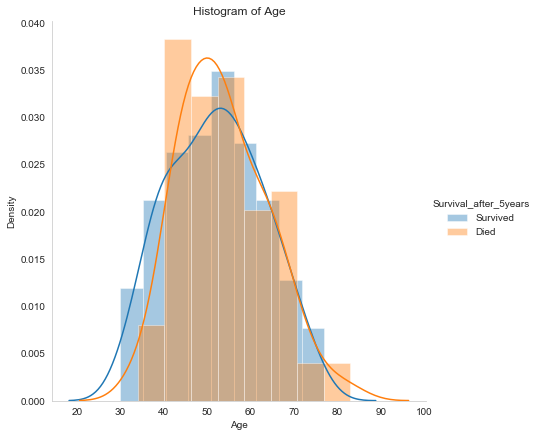

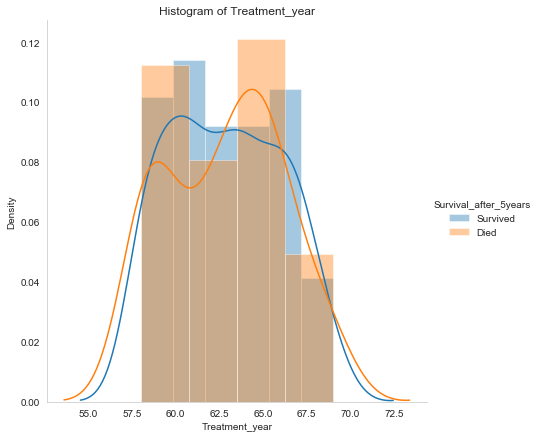

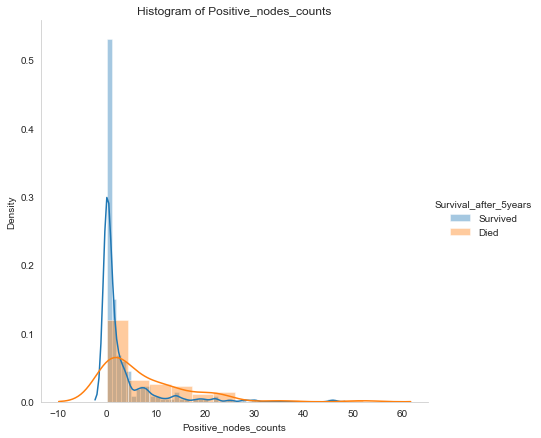

In [29]:


for feature in columns:
    sns.FacetGrid(df,hue='Survival_after_5years',height=6).map(sns.distplot,feature).add_legend()
    plt.grid() 
    plt.title("Histogram of {}".format(feature))
    plt.ylabel("Density")
    plt.show()

np.histogram Returns
-------
hist : array
    The values of the histogram. See `density` and `weights` for a
    description of the possible semantics.
bin_edges : array of dtype float
    Return the bin edges ``(length(hist)+1)``.


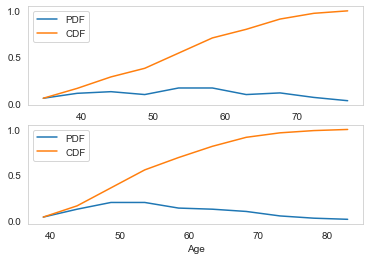

******************** Age ********************


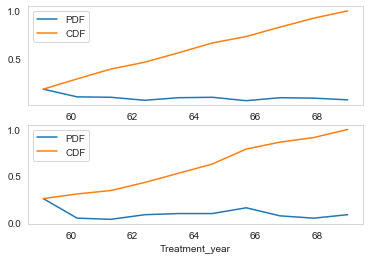

******************** Treatment_year ********************


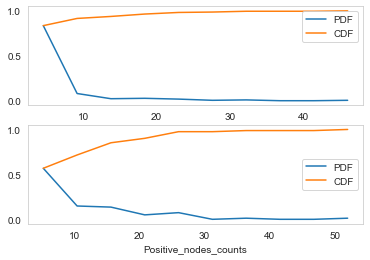

******************** Positive_nodes_counts ********************


In [30]:
for feature in columns:
    plt.figure(1)
    # for survival case
    c,bin_edges=np.histogram(df_survived[feature],bins=10,density=True)
    pdf=c/(sum(c))
    cdf=np.cumsum(pdf)
    plt.subplot(211)
    plt.grid()
    plt.xlabel(feature)
    plt.plot(bin_edges[1:],pdf,label='PDF')
    plt.plot(bin_edges[1:],cdf,label='CDF')
    plt.legend()
    
    
    #for died case
    c,bin_edges=np.histogram(df_died[feature],bins=10,density=True)
    pdf=c/(sum(c))
    cdf=np.cumsum(pdf)
    plt.subplot(212)
    plt.grid()
    plt.xlabel(feature)
    plt.plot(bin_edges[1:],pdf,label='PDF')
    plt.plot(bin_edges[1:],cdf,label='CDF')
    plt.legend()
    plt.show()
    print('*'*20,feature,'*'*20)
    


Huge overlap between Age and Treatment_year
higher survival rate for patients with postive lymph count less than 3

In [114]:
print("Mean")
print("survived",df_survived['Positive_nodes_counts'].mean())
print("died",df_died['Positive_nodes_counts'].mean())
print('**'*20)

print("mean with outliers for survived,", np.mean(np.append(df_survived['Positive_nodes_counts'],200)))
print("mean with outliers for died,", np.mean(np.append(df_died['Positive_nodes_counts'],200)))
print("std-dev")
print(df_died['Age'].std())
print('**'*20)


print("Median")
print(df_survived['Positive_nodes_counts'].median())

print("median with outliers,", np.median(np.append(df_survived['Positive_nodes_counts'],200)))
from statsmodels.robust import mad
print("mad",mad(df_survived['Positive_nodes_counts']))

print('quantile')
print(np.percentile(df_survived['Age'],np.arange(0,100,25)))
print("90 Percentile")
print(np.percentile(df_died['Age'],90))
print("99.9 Percentile")
print(np.percentile(df_died['Age'],99.9))


Mean
survived 2.7911111111111113
died 7.45679012345679
****************************************
mean with outliers for survived, 3.663716814159292
mean with outliers for died, 9.804878048780488
std-dev
10.16713720829741
****************************************
Median
0.0
median with outliers, 0.0
mad 0.0
quantile
[30. 43. 52. 60.]
90 Percentile
67.0
99.9 Percentile
82.60000000000008


**Observation(s):**
1. Mean is susceptible to outliers while median is not.


# Boxplot

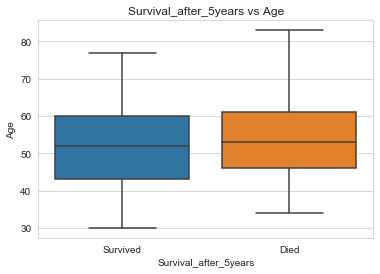

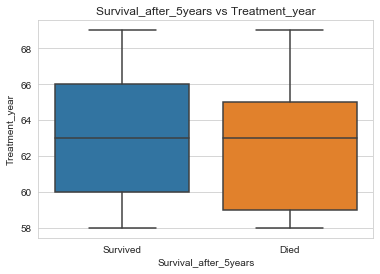

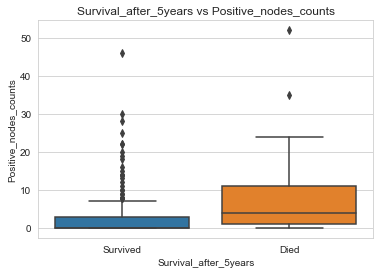

In [31]:
for feature in columns:
    sns.boxplot(x='Survival_after_5years',y=feature,data=df)
    plt.title('Survival_after_5years vs {}'.format(feature))
    plt.show()

# Violin Plot

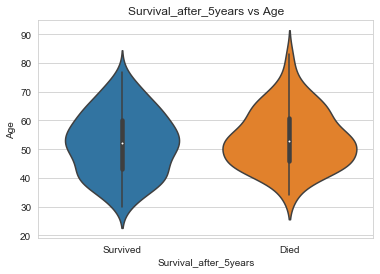

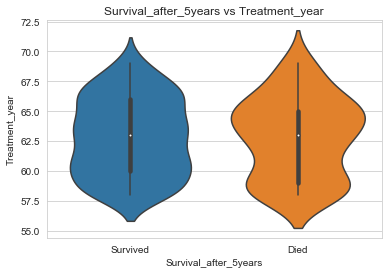

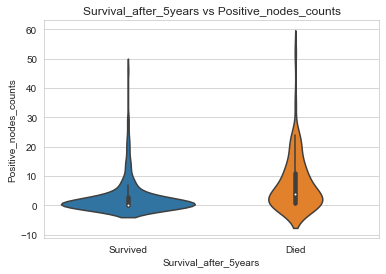

In [32]:
for feature in columns:
    sns.violinplot(x='Survival_after_5years',y=feature,data=df)
    plt.title('Survival_after_5years vs {}'.format(feature))
    plt.show()

plot1: patients within age group (44-60) have high survival chances
plo12: patients who are treated in between 60 to 66 years have high survival chances
plot3:  high survival chances for lymph count less than 3

# 2-d scatter plots

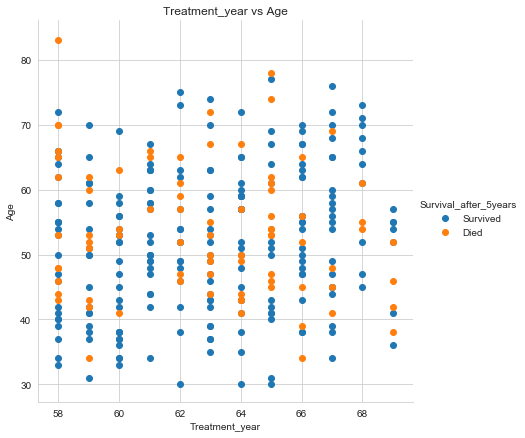

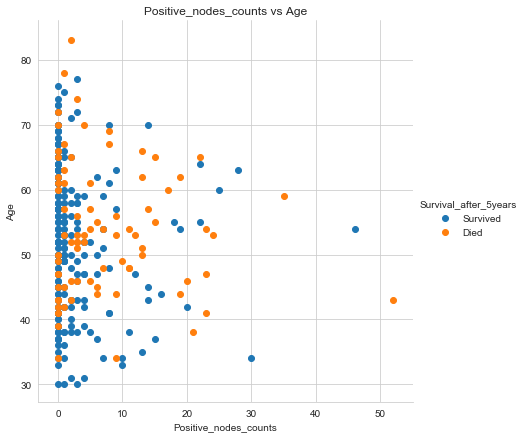

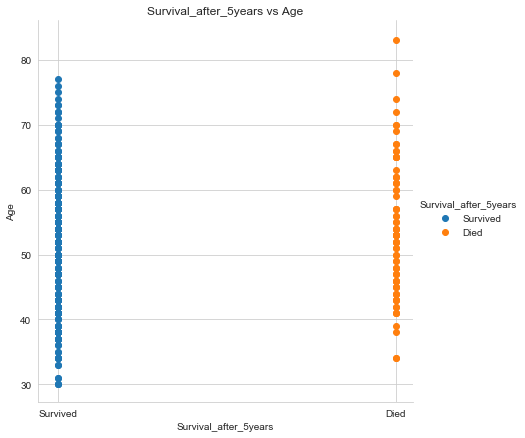

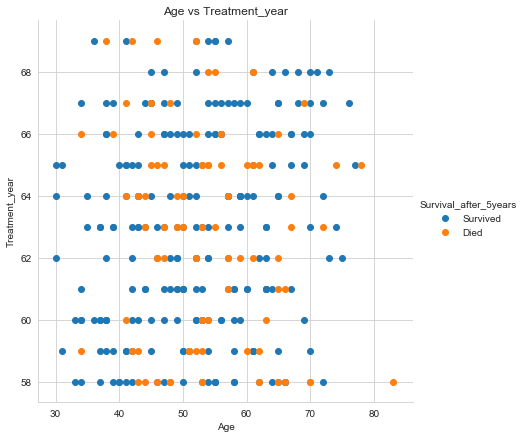

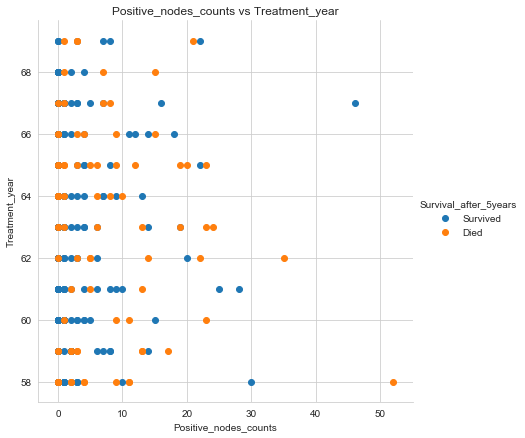

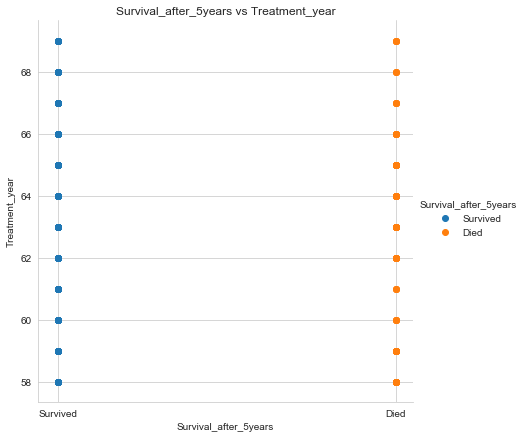

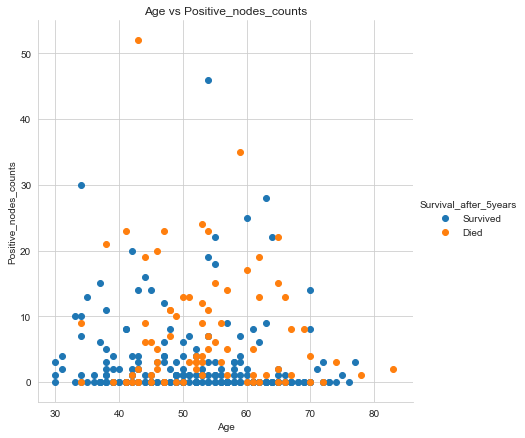

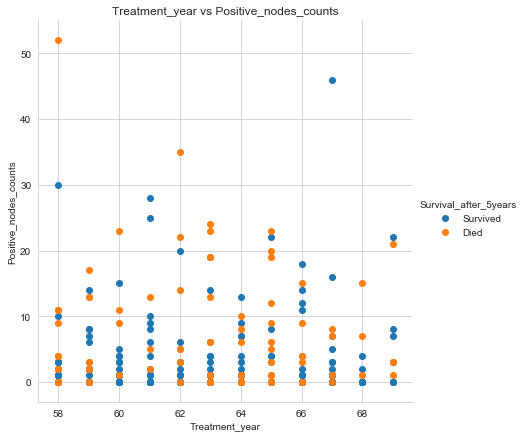

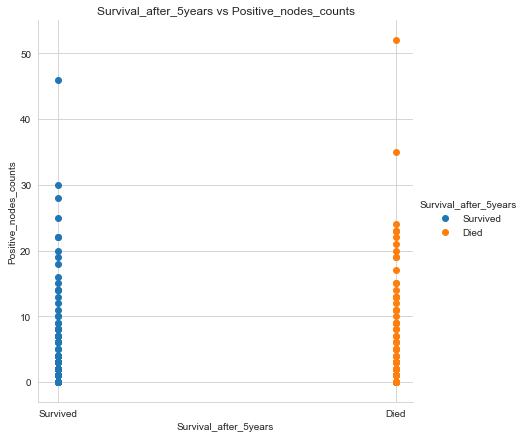

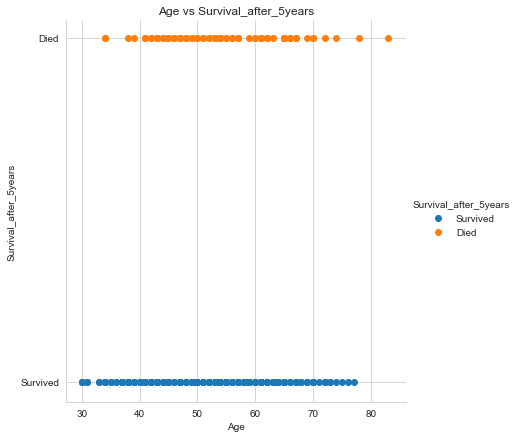

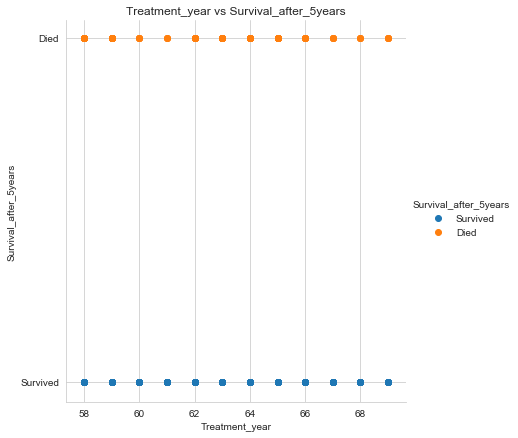

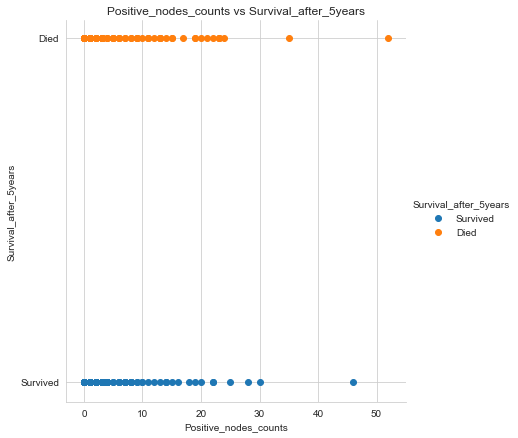

In [100]:
for feature1 in df.columns:
    for feature2 in df.columns:
        if feature1!=feature2:
            sns.FacetGrid(df,hue='Survival_after_5years', height=6).map(plt.scatter,feature2,feature1).add_legend()
            plt.title('{} vs {}'.format(feature2,feature1))
            plt.show()
            
            

    
  

# Pair Plot

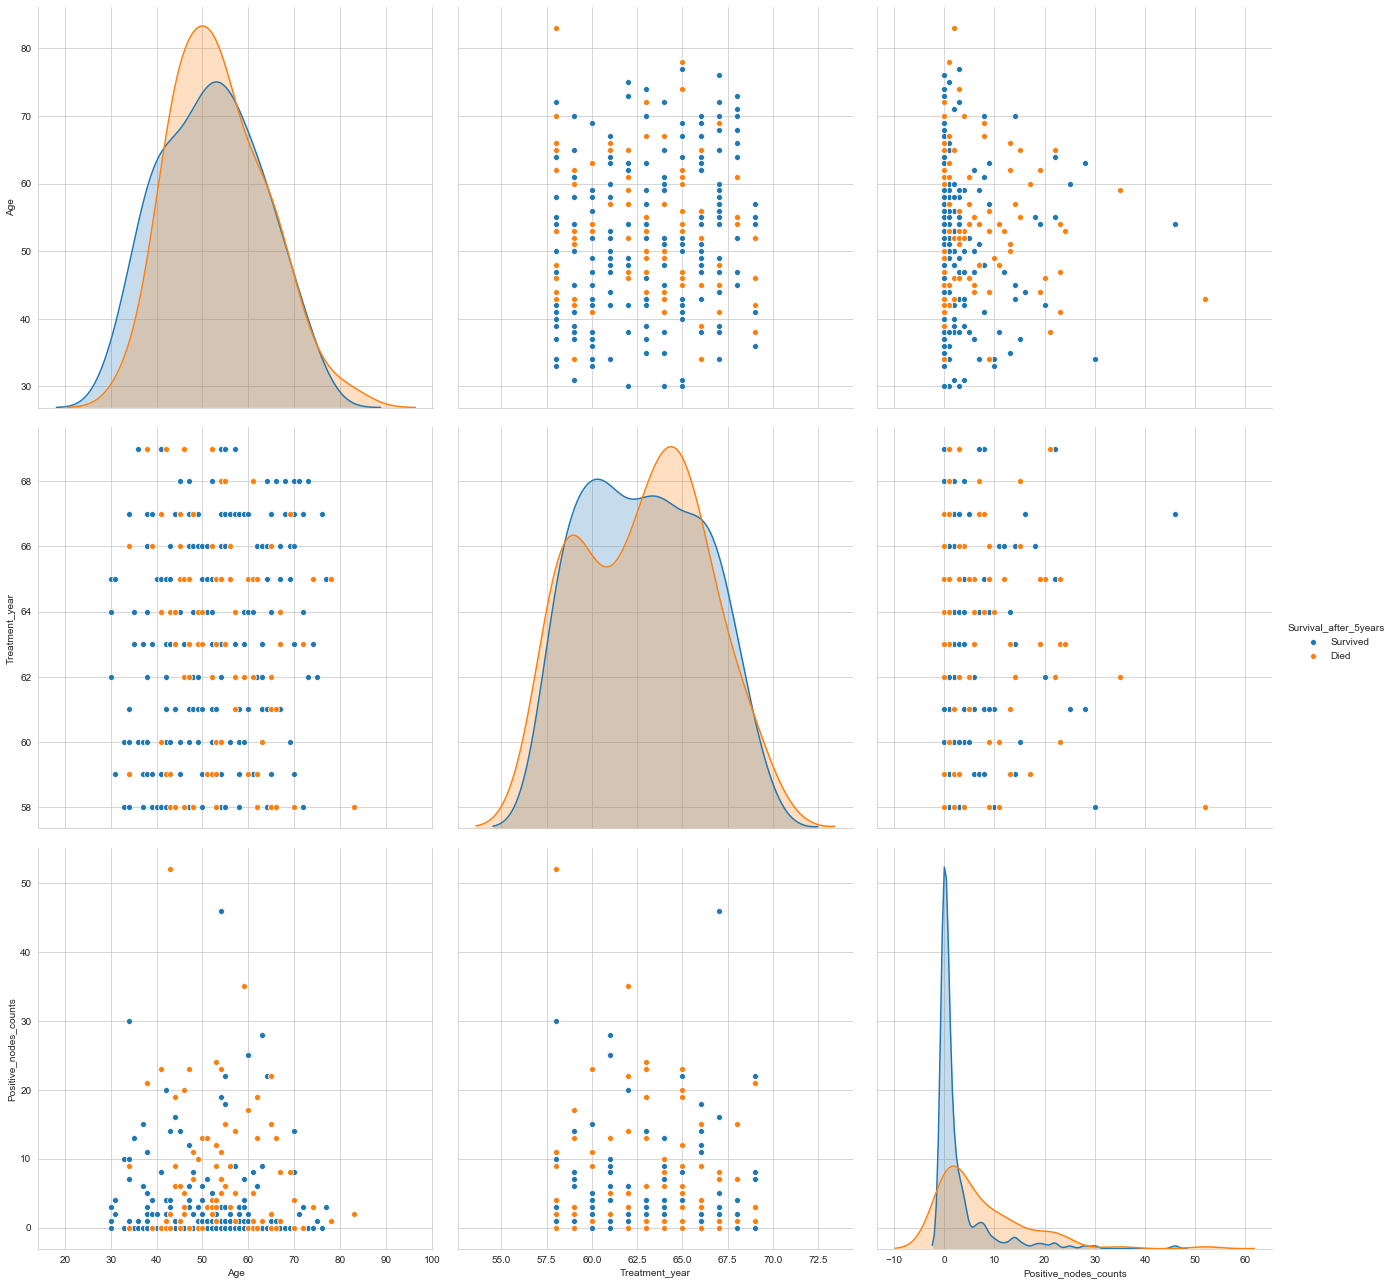

In [102]:
sns.pairplot(df,hue='Survival_after_5years', height=6)
plt.show()

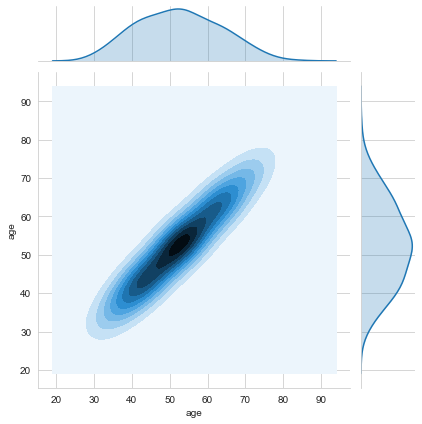

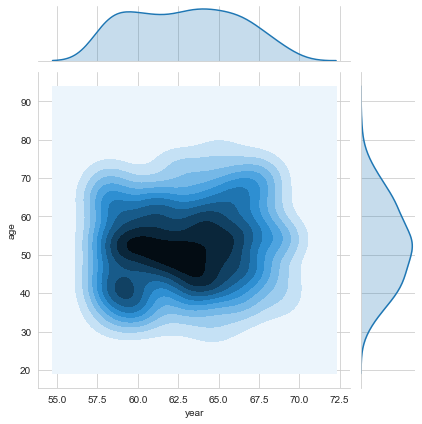

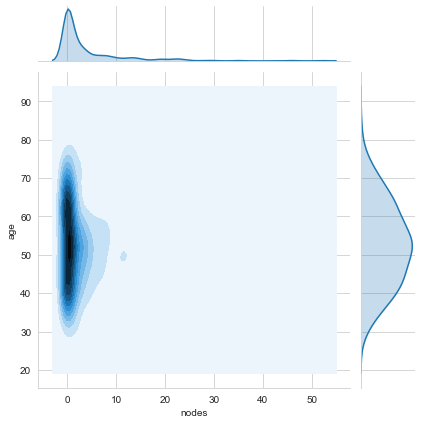

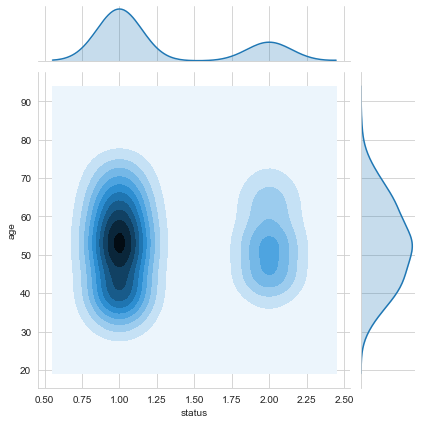

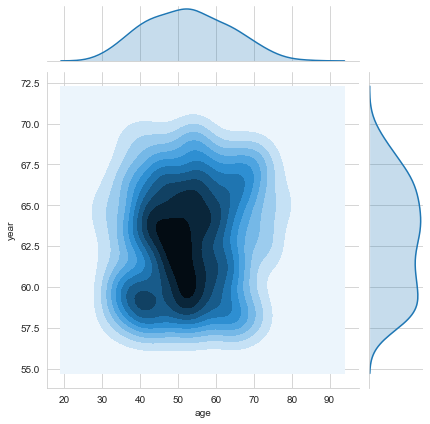

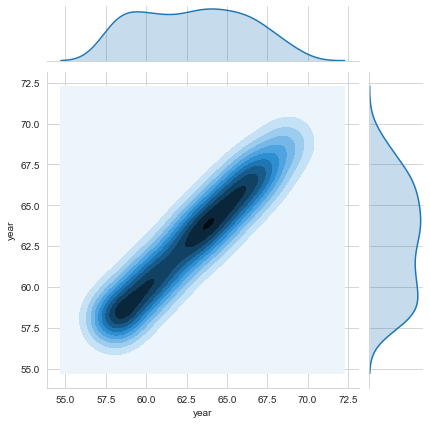

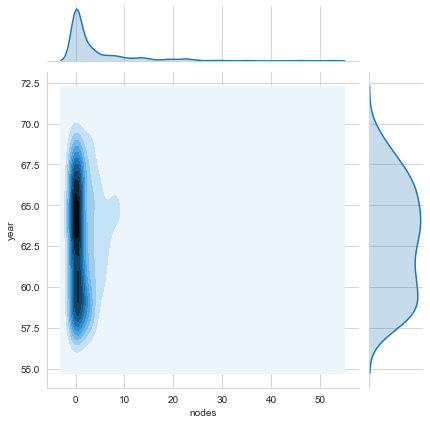

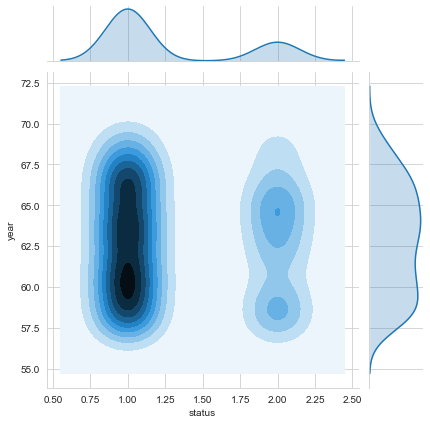

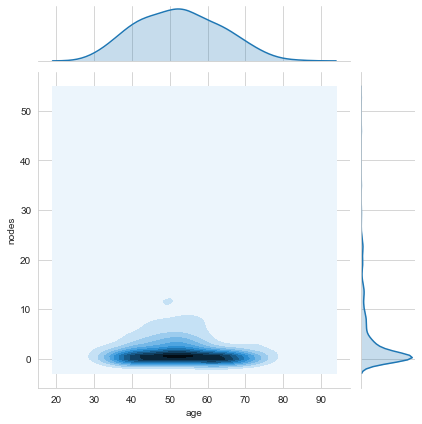

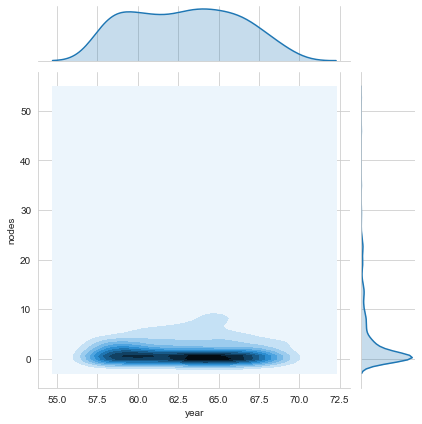

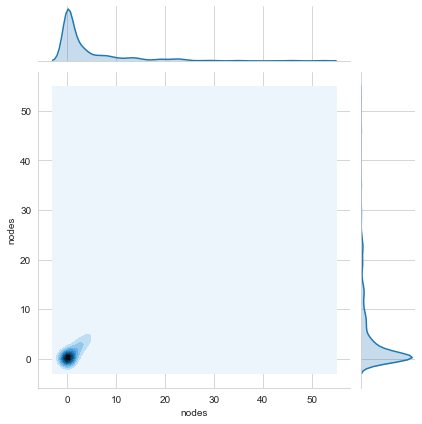

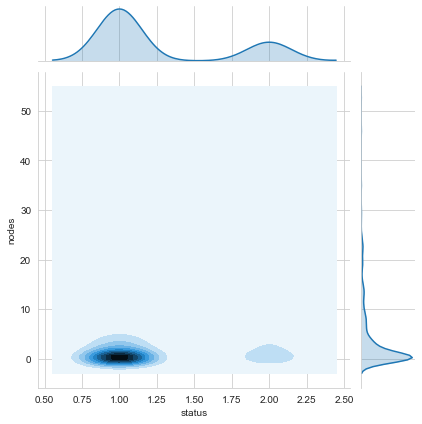

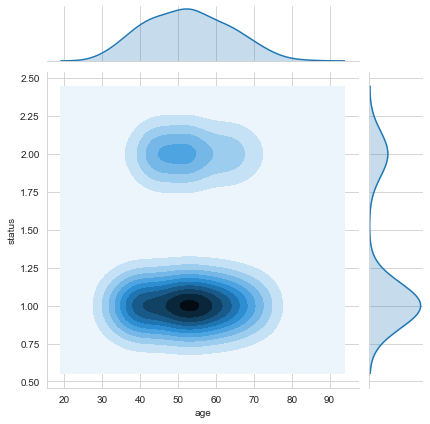

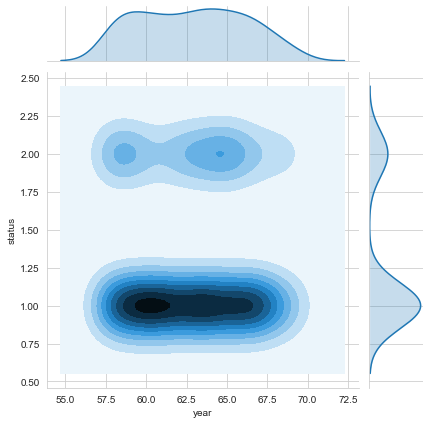

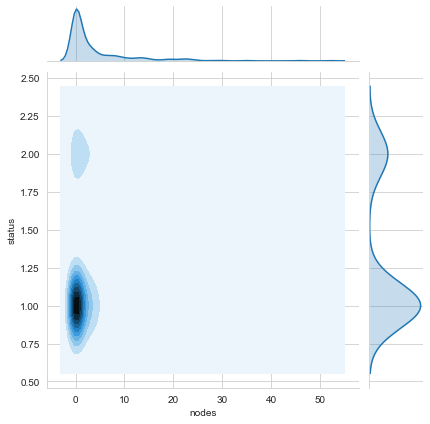

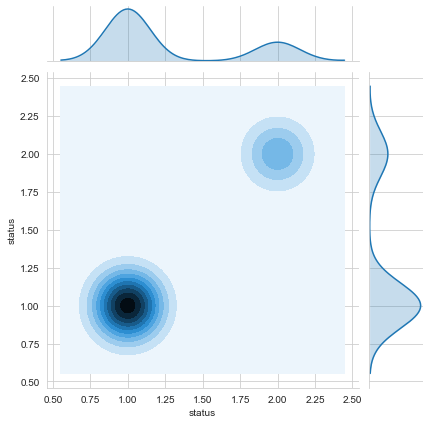

In [5]:
for feature1 in df.columns:
    for feature2 in df.columns:
            sns.jointplot(feature2,feature1,df,hue='Survival_after_5years', kind='kde')
            plt.show()
            
            

In [107]:
df_survived_SW =  df_survived.iloc[:,1]
df_died_SW = df_died.iloc[:,1]



In [108]:
from scipy import stats
stats.ks_2samp(df_survived_SW, df_died_SW)


Ks_2sampResult(statistic=0.0725925925925926, pvalue=0.885895386162465)

In [109]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')


KstestResult(statistic=0.23419198726467017, pvalue=0.577930458922569)

In [110]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')


KstestResult(statistic=0.09438269372806596, pvalue=0.3163014519569194)

In [111]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')


KstestResult(statistic=0.0816633379289381, pvalue=3.0024930586146754e-06)

Final observations:
    
Patients with lymph count less than 3 have high survival chances after 5 years.
Lymph count feature is the most effective for modelling
Younger people and people whose year of treatment is  in (60-66) age group have higher survival chances


The given dataset is not lineraly separable from each class. one of the reasons may be because the dataset is not balanced i.e. it does not contain equal data points for each class.
There are too much overlapping in the data-points and hence can't be separated by a straight line.
We cannot build a simple model to determine the survival rate.
The only feature that was promising was nodes.